<a href="https://colab.research.google.com/github/JSEFERINO/JSEFERINO/blob/main/DOEJH6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diseño de Experimentos 2^2 No balanceado**

## **Problema de aplicación**: *Supóngase un estudio clínico que analiza la eficacia de un medicamento teniendo en cuenta dos factores, el sexo (masculino y femenino) y la juventud (joven, adulto). Se quiere analizar si el efecto es diferente entre alguno de los niveles de cada variable por sí sola o en combinación.* *Este estudio implica comprobar si el efecto medio del fármaco es significativamente distinto entre alguno de los siguientes grupos: hombres, mujeres, jóvenes, adultos, hombres jóvenes, hombres adultos, mujeres jóvenes y mujeres adultas.*


## **Librerías**


Las librerías utilizadas en este ejemplo son:



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
!pip install bioinfokit
from bioinfokit.analys import stat
from statsmodels.graphics.factorplots import interaction_plot

## ***Datos***

In [ ]:
corrida = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
           21, 22, 23, 24, 25, 26, 27, 28, 29, 30]

Sexo = ["FEMENINO", "MASCULINO", "MASCULINO", "FEMENINO", "MASCULINO", "MASCULINO", "MASCULINO", "FEMENINO",
       "FEMENINO", "MASCULINO", "MASCULINO", "MASCULINO", "MASCULINO", "FEMENINO", "FEMENINO", "FEMENINO",
       "MASCULINO", "FEMENINO", "FEMENINO", "MASCULINO", "MASCULINO", "FEMENINO", "MASCULINO", "MASCULINO",
       "MASCULINO", "MASCULINO", "MASCULINO", "MASCULINO", "FEMENINO", "MASCULINO"]

Edad = ["ADULTO", "ADULTO", "ADULTO", "ADULTO", "ADULTO", "ADULTO", "JOVEN", "JOVEN",
       "ADULTO", "JOVEN", "JOVEN", "ADULTO", "JOVEN", "JOVEN", "JOVEN", "ADULTO",
       "JOVEN", "ADULTO", "JOVEN", "JOVEN", "JOVEN", "JOVEN", "ADULTO", "JOVEN",
       "JOVEN", "JOVEN", "JOVEN", "JOVEN", "JOVEN", "ADULTO"]

respuesta = [7.1, 11.0, 5.8, 8.8, 8.6, 8.0, 3.0, 5.2, 3.4, 4.0, 5.3, 11.3, 4.6, 6.4,
          13.5, 4.7, 5.1, 7.3, 9.5, 5.4, 3.7, 6.2, 10.0, 1.7, 2.9, 3.2, 4.7, 4.9,
          9.8, 9.4]



## **DataFrame**

In [ ]:
datos = pd.DataFrame({'corrida': corrida, 'Sexo': Sexo, 'Edad': Edad, 'respuesta': respuesta})

datos

,corrida,Sexo,Edad,respuesta
0,1,FEMENINO,ADULTO,7.1
1,2,MASCULINO,ADULTO,11.0
2,3,MASCULINO,ADULTO,5.8
3,4,FEMENINO,ADULTO,8.8
4,5,MASCULINO,ADULTO,8.6
5,6,MASCULINO,ADULTO,8.0
6,7,MASCULINO,JOVEN,3.0
7,8,FEMENINO,JOVEN,5.2
8,9,FEMENINO,ADULTO,3.4
9,10,MASCULINO,JOVEN,4.0


# **Análisis descriptivo y gráfico**


### *En primer lugar, se generan los diagramas Box-plot para identificar posibles diferencias notables, asimetrías, valores atípicos y homogeneidad de varianza entre los distintos *niveles*. Se calcula también la media y varianza de cada grupo.*

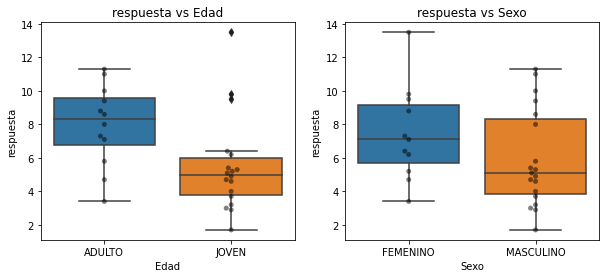

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].set_title('respuesta vs Edad')
sns.boxplot(x="Edad", y="respuesta", data=datos, ax=axs[0])
sns.swarmplot(x="Edad", y="respuesta", data=datos, color='black',
              alpha = 0.5, ax=axs[0])

axs[1].set_title('respuesta vs Sexo')
sns.boxplot(x="Sexo", y="respuesta", data=datos, ax=axs[1])
sns.swarmplot(x="Sexo", y="respuesta", data=datos, color='black',
              alpha = 0.5, ax=axs[1]);

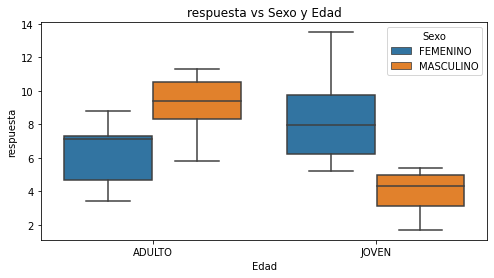

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.set_title('respuesta vs Sexo y Edad')
sns.boxplot(x="Edad", y="respuesta", hue='Sexo', data=datos, ax=ax);

In [ ]:
print('Resultados medios y desviación típica por edad')
datos.groupby('Edad')['respuesta'].agg(['mean', 'std'])

Resultados medios y desviación típica por edad


,mean,std
Edad,,
ADULTO,7.950000,2.431049
JOVEN,5.505556,2.871047


In [ ]:
print('Resultados medios y desviación típica por sexo')
datos.groupby('Sexo')['respuesta'].agg(['mean', 'std'])

Resultados medios y desviación típica por sexo


,mean,std
Sexo,,
FEMENINO,7.445455,2.828202
MASCULINO,5.926316,2.906858


In [ ]:
print('Resultados medios y desviación típica por edad y sexo')
datos.groupby(['Edad', 'Sexo'])['respuesta'].agg(['mean', 'std'])

Resultados medios y desviación típica por edad y sexo


mean       std
Edad   Sexo                         
ADULTO FEMENINO   6.260000  2.170944
       MASCULINO  9.157143  1.900752
JOVEN  FEMENINO   8.433333  3.106552
       MASCULINO  4.041667  1.157158

# **Conclusion**.
### A partir de la representación gráfica y el cálculo de las medias se puede intuir que existe una diferencia en el efecto del fármaco dependiendo de la edad y también del sexo. El efecto parece ser mayor en mujeres que en hombres y en adultos que en jóvenes, si bien la significancia se tendrá que confirmar con el ANOVA. La distribución de las observaciones de cada nivel parece simétrica con la presencia de un único valor atípico. A priori parece que se satisfacen las condiciones necesarias para un ANOVA, aunque habrá que confirmarlas estudiando los residuos.

# **Gráfico de interacciones**

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot

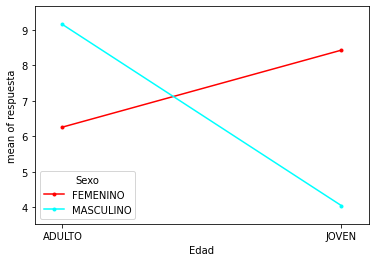

In [ ]:
# Gráfico de interacciones
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 4))
fig = interaction_plot(
    x        = datos.Edad,
    trace    = datos.Sexo,
    response = datos.respuesta,
    ax       = ax,)

Se observa una clara interacción entre ambos factores. La respuesta al fármaco es distinta entre adultos y jóvenes, y de tendencia inversa dependiendo del sexo. En mujeres, la respuesta es mayor cuando son jóvenes que cuando son adultas y en hombres mayor cuando son adultos y menor cuando son jóvenes. El ANOVA confirmará si las diferencias observadas son significativas.

## **Test ANOVA**

In [ ]:
!pip install pingouin

In [ ]:
import pingouin as pg

In [ ]:
# Test ANOVA de dos vías (Two-way ANOVA)
# ==============================================================================
pg.anova(
    data     = datos,
    dv       = 'respuesta',
    between  = ['Sexo', 'Edad'],
    detailed = True
).round(4)

,Source,SS,DF,MS,F,p-unc,np2
0,Sexo,12.0164,1.0,12.0164,3.0183,0.0942,0.1040
1,Edad,38.9611,1.0,38.9611,9.7862,0.0043,0.2735
2,Sexo * Edad,89.6114,1.0,89.6114,22.5085,0.0001,0.4640
3,Residual,103.5116,26.0,3.9812,NaN,NaN,NaN


## ***Conclusión***
*El análisis de varianza no encuentra diferencias significativas en el efecto del fármaco entre hombres y mujeres (factor Sexo) pero sí encuentra diferencias significativas entre jóvenes y adultos y entre al menos dos grupos de las combinaciones de sexo y edad, es decir, hay significancia para la interacción. El tamaño del efecto  η2  es grande tanto para edad como para la interacción de edad y sexo.*

Nota: *en este caso, el orden en el que se multiplican los factores sí afecta a los resultados puesto que el tamaño de los grupos no es igual.*

## ***Anova usando StatModels***

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model2 = ols('respuesta ~ Sexo*Edad',                 # Model formula
            data = datos).fit()
                
anova_result = sm.stats.anova_lm(model2, typ=2)
print (anova_result)

               sum_sq    df          F    PR(>F)
Sexo        12.016426   1.0   3.018279  0.094165
Edad        38.961096   1.0   9.786228  0.004301
Sexo:Edad   89.611376   1.0  22.508538  0.000066
Residual   103.511643  26.0        NaN       NaN


In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["respuesta"],     # Data
                          groups=datos["Sexo"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()  


group1,group2,meandiff,p-adj,lower,upper,reject
FEMENINO,MASCULINO,-1.5191,0.1747,-3.7535,0.7152,False


In [ ]:
tukey = pairwise_tukeyhsd(endog=datos["respuesta"],     # Data
                          groups=datos["Edad"],   # Groups
                          alpha=0.05)          # Significance level

#tukey.plot_simultaneous()    # Plot group confidence intervals
#plt.vlines(x=49.57,ymin=-0.5,ymax=14.5, color="red")

tukey.summary()  

group1,group2,meandiff,p-adj,lower,upper,reject
ADULTO,JOVEN,-2.4444,0.0221,-4.5108,-0.3781,True
